# Potable Water Volumes

In [1]:
%load_ext autoreload
%autoreload 2

%run relativepath.py
%run commonimports.py
%run displayoptions.py

In [2]:
potable_water_dataset = StatscanZip('https://www150.statcan.gc.ca/n1/en/tbl/csv/38100092-eng.zip?st=yQYQGvmD')
potable_water = potable_water_dataset.get_data(index_col='REF_DATE')

Extracting files to C:\Users\dwight\.canadadata\repo\extracted\38100092
Extracting files to C:\Users\dwight\.canadadata\repo\extracted\38100092


In [3]:
potable_water_dataset.get_data(wide=False)

,GEO,All source water types,Groundwater,Groundwater and groundwater under the direct influence of surface water (GUDI),Groundwater under the direct influence of surface water (GUDI),Surface water
REF_DATE,,,,,,
2005,Canada,5706.2,NaN,674.3,NaN,5031.9
2005,Newfoundland and Labrador,153.3,NaN,12.8,NaN,140.4
2005,Prince Edward Island,9.9,NaN,9.9,NaN,0.0
2005,Nova Scotia,111.2,NaN,11.1,NaN,100.1
2005,New Brunswick,109.4,NaN,30.7,NaN,78.7
2005,Quebec,1856.2,NaN,180.9,NaN,1675.3
2005,Ontario,1883.7,NaN,206.3,NaN,1677.3
2005,Manitoba,116.5,NaN,12.4,NaN,104.1
2005,Saskatchewan,123.9,NaN,21.3,NaN,102.6


In [4]:
potable_water.head()

,GEO,All source water types,Groundwater,Groundwater and groundwater under the direct influence of surface water (GUDI),Groundwater under the direct influence of surface water (GUDI),Surface water
REF_DATE,,,,,,
2005,Canada,5706.2,NaN,674.3,NaN,5031.9
2005,Newfoundland and Labrador,153.3,NaN,12.8,NaN,140.4
2005,Prince Edward Island,9.9,NaN,9.9,NaN,0.0
2005,Nova Scotia,111.2,NaN,11.1,NaN,100.1
2005,New Brunswick,109.4,NaN,30.7,NaN,78.7


In [5]:
potable_column_subset = potable_water[['GEO', 'All source water types']]

## By Province

In [6]:
potable_latest = potable_column_subset[potable_water.index == 2015]

In [7]:
potable_latest
water_by_province = potable_latest[~(potable_latest.GEO.str.match('.* region|Canada'))]\
            .rename(columns={'All source water types':'Volume'}).sort_values('Volume', ascending=True).set_index('GEO')
water_by_province

,Volume
GEO,
Nunavut,2.7
Northwest Territories,5.4
Yukon,7.1
Prince Edward Island,11.3
Nova Scotia,90.6
New Brunswick,100.1
Manitoba,109.3
Saskatchewan,121.5
Newfoundland and Labrador,128.1


Text(1400, 0.2, 'Source: Statscan')

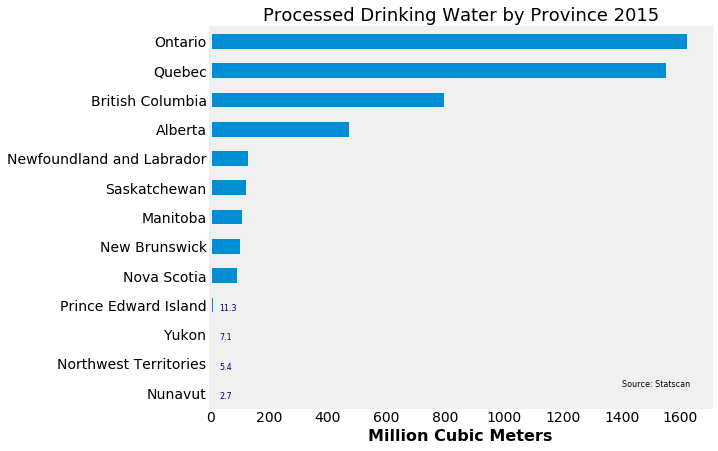

In [8]:
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline
ax = water_by_province.Volume.plot.barh( figsize=(8,7), grid=False)
ax.grid(False, axis='y')
ax.set_title(label='Processed Drinking Water by Province 2015', fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Million Cubic Meters', fontsize=16, fontweight='bold')
ax.set_ylabel('')
ax.text(s='2.7', x=30, y=-.2, size=8,color='darkblue')
ax.text(s='5.4', x=30, y=.8, size=8, color='darkblue')
ax.text(s='7.1', x=30, y=1.8, size=8, color='darkblue')
ax.text(s='11.3', x=30, y=2.8, size=8, color='darkblue')
ax.text(s='Source: Statscan', x=1400, y=.2, size=8)

In [9]:
ax.get_ylim()

(-0.5, 12.5)

## Population

In [10]:
population = pd.read_csv('../data/Provinces.csv')

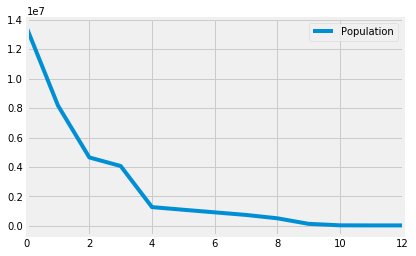

In [11]:
population.plot()